In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('fb_data_clean.csv')

/var/folders/6w/yt_9nm1s5ngbsytz47vfxfjh0000gn/T/ipykernel_6362/387389473.py:1: DtypeWarning: Columns (18,26,27,28,29,30,31,32,33,35,36,37,38,39,40,41,42,52,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fb_data_clean.csv')


In [3]:
df["adv_type"].value_counts()

candidate       168849
party           131260
og_superPAC      41453
og_hybridPAC     38918
og_irs501(c)     23435
og_corp          19036
og_PAC            7093
Name: adv_type, dtype: int64

In [6]:
df.columns

Index(['archive_id', 'ad_creative_body', 'ad_creation_time',
       'ad_delivery_start_time', 'ad_delivery_stop_time', 'page_id',
       'funding_entity', 'min_spend', 'max_spend', 'min_impressions',
       'max_impressions', 'page_name', 'sent_neg', 'sent_neu', 'sent_pos',
       'sent_comp', 'ad_numStates', 'ad_targetStates', 'ad_microtargeted',
       'impressions_range', 'impressions_avg', 'sent_rank', 'fec_id',
       'fec_name', 'fec_code', 'fec_state', 'fec_cand_id', 'fec_cand_name',
       'fec_cand_party', 'fec_cand_status', 'crp_name', 'crp_code',
       'crp_disclosure', 'crp_viewpoint', 'crp_spending', 'irs_name',
       'irs_ein', 'irs_state', 'irs_type', 'corp_name', 'corp_id',
       'corp_state', 'corp_type', 'adv_type', 'adv_id', 'adv_count',
       'adv_count_row', 'adv_numStates', 'adv_targetStates', 'adv_viewpoint',
       'adv_mentionsCand', 'adv_federal', 'adv_transparent', 'registered_2016',
       'registered_2020', 'adv_disappeared', 'ad_text', 'sentiment',
   

In [8]:
adv = df[["adv_transparent", "adv_disappeared", "adv_type", "adv_id"]].drop_duplicates()
adv["adv_type"].value_counts()

candidate       884
og_superPAC     125
party           101
og_irs501(c)     83
og_PAC           36
og_hybridPAC     25
og_corp          23
Name: adv_type, dtype: int64

In [9]:
125+83+36+25+23

292

In [10]:
len(df["adv_id"].unique())

1277

In [11]:
292+884+101

1277

In [40]:
for a in df["adv_type"].unique():
    curr = df[df["adv_type"]==a]
    print(a, np.mean(curr["sentiment"]), np.std(curr["sentiment"]))

candidate 0.4557003275115637 0.5130452181692522
party 0.25680122733506017 0.38009391928103675
og_irs501(c) 0.129713906550032 0.5670258278252058
og_PAC 0.2874713379388129 0.4565298928435877
og_superPAC 0.11381657057390297 0.4540431221826641
og_hybridPAC 0.06798038439796496 0.450590196380701
og_corp 0.029842451145198592 0.5765301605370615


In [55]:
cand = df[df["adv_type"].isin(["candidate"])]
party = df[df["adv_type"].isin(["party"])]

PAC = df[df["adv_type"]=="og_PAC"]
hybridPAC = df[df["adv_type"]=="og_hybridPAC"]
superPAC = df[df["adv_type"]=="og_superPAC"]
irs501c = df[df["adv_type"]=="og_irs501(c)"]
corp = df[df["adv_type"]=="og_corp"]

In [42]:
dark = df[df["adv_disclosure"]=='n']
transparent = df[df["adv_disclosure"]!='n']

print(np.mean(dark["sentiment"]), np.std(dark["sentiment"]))
print(np.mean(transparent["sentiment"]), np.std(transparent["sentiment"]))
print()

print(100*len(dark[dark["sentiment"]<-0.05])/len(dark))
print(100*len(transparent[transparent["sentiment"]<-0.05])/len(transparent))

0.05857550995148036 0.5726516148664554
0.3112981891348089 0.4792209625876747

36.37241311020893
19.400073912864944


In [43]:
disappear = df[(df["adv_disappeared"]==True)]
persistant = df[(df["adv_disappeared"]==False)]

print(np.mean(disappear["sentiment"]), np.std(disappear["sentiment"]))
print(np.mean(persistant["sentiment"]), np.std(persistant["sentiment"]))

print()
print(100*len(disappear[disappear["sentiment"]<0])/len(disappear))
print(100*len(persistant[persistant["sentiment"]<0])/len(persistant))

0.05182148998445076 0.588713033712455
0.30018718402265676 0.4854952379033437

37.61547608158785
20.473665900660986


In [83]:
dark_disappear = df[(df["adv_disclosure"]=='n')&(df["adv_disappeared"]==True)]
dark_persistant = df[(df["adv_disclosure"]=='n')&(df["adv_disappeared"]==False)]
transparent_disappear = df[(df["adv_disclosure"]!='n')&(df["adv_disappeared"]==True)]
transparent_persistant = df[(df["adv_disclosure"]!='n')&(df["adv_disappeared"]==False)]


In [91]:
liberal = df[df["adv_viewpoint"]=="liberal"]
conservative = df[df["adv_viewpoint"]=="conservative"]

In [90]:
df["adv_viewpoint"].value_counts()

liberal         232129
conservative    193686
Name: adv_viewpoint, dtype: int64

In [47]:
(18018+3378) / len(disappear)

0.9785054422390926

In [48]:
quartiles = df["sentiment"].quantile([0.25, 0.75])
quartiles[0.75], quartiles[0.25]

(0.7088, 0.0)

In [49]:
len(df[df["sentiment"]<0])/len(df)

0.21345257694561487

In [50]:
def formatFloat(val, fmt="%.2f"):
    ret = fmt % val
    if ret.startswith("0."):
        return ret[1:]
    if ret.startswith("-0."):
        return "-" + ret[2:]
    return ret

In [51]:
superPAC["adv_disclosure"].value_counts()

y    26531
p    14070
n      852
Name: adv_disclosure, dtype: int64

In [52]:
hybridPAC["adv_disclosure"].value_counts()

y    38352
p      566
Name: adv_disclosure, dtype: int64

In [93]:
len(conservative), len(conservative["adv_id"].unique())

(193686, 505)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


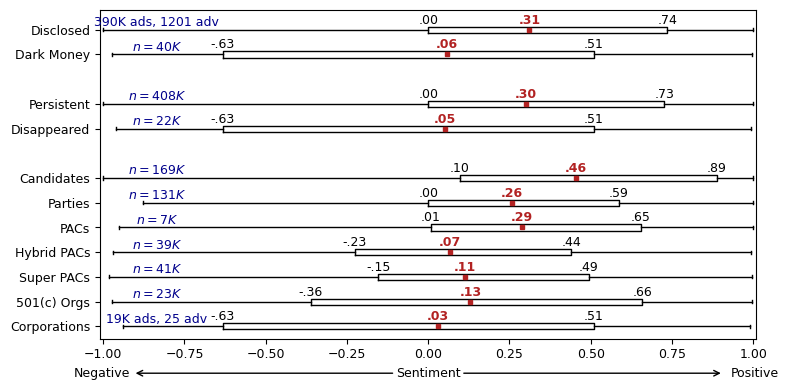

In [63]:
groups = ['Disclosed', 'Dark Money',
          'Persistent', 'Disappeared',
          'Candidates', 'Parties', 'PACs', 'Hybrid PACs', 'Super PACs', '501(c) Orgs', 'Corporations'][::-1]
plt.rcParams["figure.figsize"] = [8,4]

fig, ax = plt.subplots()

plot_data = [transparent['sentiment'], dark['sentiment'], [], 
             persistant['sentiment'],disappear['sentiment'], [], 
             cand['sentiment'], party['sentiment'], 
             PAC['sentiment'], hybridPAC['sentiment'], superPAC['sentiment'], irs501c['sentiment'], corp['sentiment']][::-1]

med = dict(linewidth=0, color='k')
mean = {"marker":"s","markeredgecolor":'#B22222',"markerfacecolor":'#B22222', 'markersize':2.5}

bp_dict = ax.boxplot(plot_data,notch=False,vert=False,showfliers=False, widths=0.25, medianprops=med, showmeans=True, meanprops=mean)

ax.set_yticks([1,2,3,4,5,6,7,9,10,12,13])
ax.set_yticklabels(groups, fontsize=8)

saved = []
for line in bp_dict['boxes']:
    x_left,y_left = line.get_xydata()[1] # lower quartile
    x_right,y_right = line.get_xydata()[2] # upper quartile
    saved.append(y_left)
    ax.text(x_left, y_left+0.12, formatFloat(round(x_left,2)), horizontalalignment='center', fontsize=9, color='k')
    ax.text(x_right, y_right+0.12, formatFloat(round(x_right,2)), horizontalalignment='center', fontsize=9, color='k')

for i,line in enumerate(bp_dict['means']):
    # get position data for median line
    x, y = line.get_xydata()[0] # top of median line
    # overlay median value
    ax.text(x, saved[i]+0.12, formatFloat(round(x,2)),
         horizontalalignment='center', fontsize=9, color='#B22222', weight="bold") # draw above, centered

perc = ['390K ads, 1201 adv', '40K ads, 76 adv','',
        '408K ads, 1209 adv', '22K ads, 68 adv', '', 
        '169K$', '$n=131K$', '$n=7K$', '$n=39K$', '$n=41K$', '$n=23K$', '19K ads, 25 adv'][::-1]
for i in range(1,14):
    if i==0:
            ax.text(-0.835, i+0.15, perc[i-1],
     horizontalalignment='center', fontsize=9, color='#00008B') # draw above, centered
    else:
        ax.text(-0.835, i+0.15, perc[i-1],
         horizontalalignment='center', fontsize=9, color='#00008B') # draw above, centered


'''
for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[0] # top of median line
    # overlay median value
    ax.text(x, y+0.45, formatFloat(x),
         horizontalalignment='center', fontsize=8) # draw above, centered
'''
plt.text(-1.09,-1.05,'Negative', fontsize=9)
plt.text(.93,-1.05,'Positive', fontsize=9)

ax.annotate('', xy=(0.05, -0.105), xycoords='axes fraction', xytext=(0.45, -0.105), arrowprops=dict(arrowstyle="->", color='k'))
ax.annotate('', xy=(0.55, -0.105), xycoords='axes fraction', xytext=(0.95, -0.105), arrowprops=dict(arrowstyle="<-", color='k'))

    
ax.tick_params(axis='both', labelsize=9)
plt.xlim([-1.01,1.01])
plt.ylim([0.5,13.8])
plt.xlabel('Sentiment', fontsize=9)
#plt.show()
fig.tight_layout()
plt.savefig('sent_box_main.pdf', format='pdf', dpi=1000)